In [1]:
import vaccontrib as vc
from vaccontrib.linalg import convert_2d_block_to_4d_matrix, convert_4d_matrix_to_2d_block
import numpy as np
from numpyarray_to_latex.jupyter import to_jup
from IPython.display import display, Math
import bfmplot as bp
import matplotlib.pyplot as pl


In [2]:
def print_reduced_contribution_matrix_and_Reff(
        C_red,
        subscript='',
        superscript='',
    ):
    if not subscript.startswith('_'):
        if not subscript == '':
            subscript = '_{'+subscript+'}'
    if not superscript.startswith('^'):
        if not subscript == '':
            superscript = '^{'+superscript+'}'
    to_jup(C_red,prefix='C'+superscript+subscript+'=')
    R_eff = (C_red.sum(axis=0))
    to_jup(R_eff,prefix='R'+superscript+subscript+'=',is_row_vector=False)
    
def get_homogeneous_contribution_matrix(variant,R0):
    v, s, r = vc.io.get_homogeneous_vaccination_parameters(variant=variant)
    #print(v,s,r)
    C_hom = vc.get_homogeneous_contribution_matrix(R0, v, s, r)
    return C_hom

def get_homogeneous_next_generation_matrix(variant,R0):
    v, s, r = vc.io.get_homogeneous_vaccination_parameters(variant=variant)
    #print(v,s,r)
    K_hom = vc.get_homogeneous_next_generation_matrix(R0, v, s, r)
    return K_hom

def get_homogeneous_eigenvector(variant):
    v, s, r = vc.io.get_homogeneous_vaccination_parameters(variant=variant)
    #print(v,s,r)
    y_hom = vc.get_homogeneous_eigenvector(v, s)
    return y_hom

def get_heterogeneous_reduced_contribution_matrix(variant,R0,):
    matrices = vc.covid.get_covid_matrices(variant=variant)    
    C_red = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid(R0,variant=variant)
    return C_red

def print_reduced_contribution_matrix_and_Reff_for_all_R_combinations(
        variant,
        base_R0,
        subscript='',
        superscript='',
        is_homogeneous=False,
        V=5,
    ):
    
    for unvacc_R in [base_R0,1.,0.]:
        display('# ================')
        display("# R0_unvacc = "+ str(unvacc_R))
        for is_homogeneous in [False, True]:
            R0 = [unvacc_R] + (V-1) * [base_R0]
            this_subscript = str(subscript)
            if is_homogeneous:
                C = get_homogeneous_contribution_matrix(variant,R0)
                if not this_subscript == '':
                    this_subscript = this_subscript + ','
                this_subscript += '\mathrm{hom}'
            else:
                C = get_heterogeneous_reduced_contribution_matrix(variant,R0)
            print_reduced_contribution_matrix_and_Reff(C,this_subscript,superscript)
        

In [3]:
print_reduced_contribution_matrix_and_Reff_for_all_R_combinations(
    variant='delta',
    base_R0=6.,
    subscript=r'\delta'
)

'# ================'

'# R0_unvacc = 6.0'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'# ================'

'# R0_unvacc = 1.0'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'# ================'

'# R0_unvacc = 0.0'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
print_reduced_contribution_matrix_and_Reff_for_all_R_combinations(
    variant='alpha',
    base_R0=4.,
    subscript=r'\alpha'
)

'# ================'

'# R0_unvacc = 4.0'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'# ================'

'# R0_unvacc = 1.0'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'# ================'

'# R0_unvacc = 0.0'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

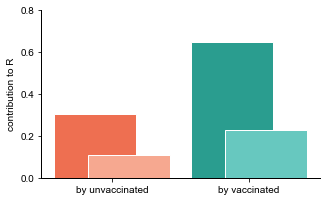

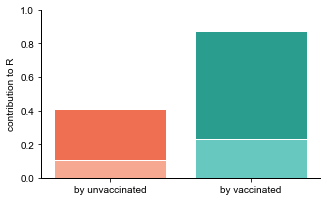

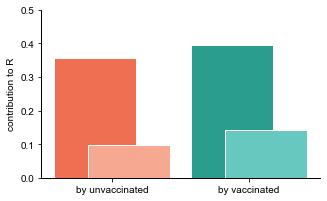

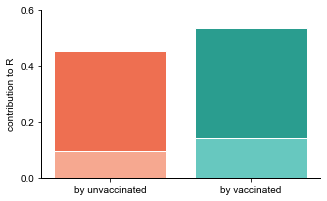

In [5]:
from vaccontrib.plot import plot_reduced_contribution_matrix, plot_reduced_contribution_matrix_stacked
Chom = get_homogeneous_contribution_matrix('delta',[1.,6.])
C = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid([1.,6,6,6,6],variant='delta')
K = vc.covid.get_next_generation_matrix_covid([1.,6,6,6,6],variant='delta')
y = vc.get_eigenvector(K)
y = y.sum(axis=0)
y = np.array([y[0],y[1:].sum()])
to_jup(y)
#C = get_homogeneous_contribution_matrix('alpha',[4.,4.])
#print(C)
#C = np.arange(9).reshape(3,3)[::-1,:]

ax = plot_reduced_contribution_matrix(Chom,0.6)
ax = plot_reduced_contribution_matrix_stacked(Chom)
ax = plot_reduced_contribution_matrix(C,0.6)
ax = plot_reduced_contribution_matrix_stacked(C)

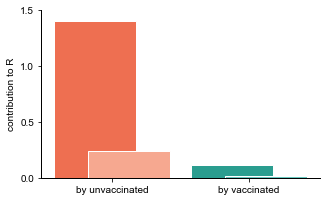

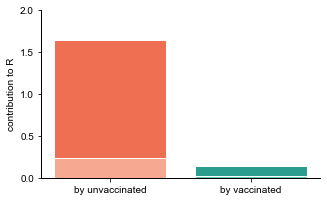

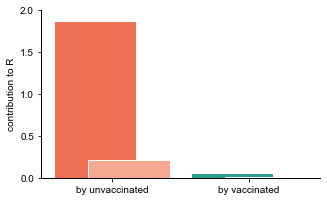

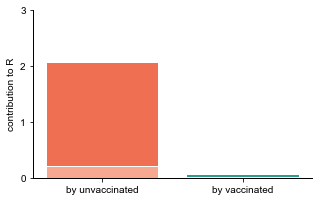

In [6]:

Chom = get_homogeneous_contribution_matrix('alpha',[4.,4.])
C = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid([4.,4,4,4,4],variant='alpha')
#C = get_homogeneous_contribution_matrix('alpha',[4.,4.])
#print(C)
#C = np.arange(9).reshape(3,3)[::-1,:]

ax = plot_reduced_contribution_matrix(Chom,0.6)
ax = plot_reduced_contribution_matrix_stacked(Chom)
ax = plot_reduced_contribution_matrix(C,0.6)
ax = plot_reduced_contribution_matrix_stacked(C)

(-1.5, 7.0, -2.05413030315993, 2.05413030315993)

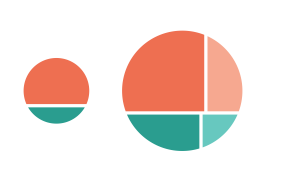

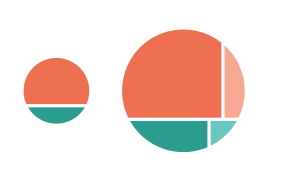

In [7]:
from vaccontrib.illustration import get_circular_vector_and_matrix_presentation

Chom = get_homogeneous_contribution_matrix('delta',[6.,6.])
C = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid([6.,6,6,6,6],variant='delta')
K = vc.covid.get_next_generation_matrix_covid([6.,6,6,6,6],variant='delta')
y = vc.get_eigenvector(K)
y = y.sum(axis=0)
y = np.array([y[0],y[1:].sum()])
#C = get_homogeneous_contribution_matrix('alpha',[4.,4.])
#print(C)
#C = np.arange(9).reshape(3,3)[::-1,:]

ax = get_circular_vector_and_matrix_presentation(y, Chom).plot()
ax.set_xlim(-1.5,7)
ax.axis('off')
ax = get_circular_vector_and_matrix_presentation(y, C).plot()
ax.set_xlim(-1.5,7)
ax.axis('off')
#ax = plot_reduced_contribution_matrix_stacked(Chom)
#ax = plot_reduced_contribution_matrix(C,0.6)
#ax = plot_reduced_contribution_matrix_stacked(C)

(-1.5, 7.0, -1.1, 1.1)

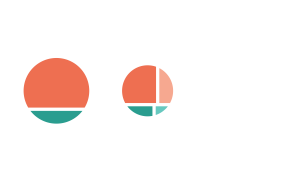

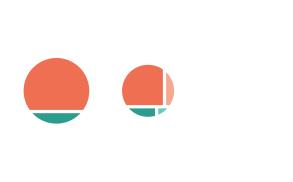

In [25]:
from vaccontrib.illustration import get_circular_vector_and_matrix_presentation

Chom = get_homogeneous_contribution_matrix('alpha',[1.,4.])
Cred = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid([1.,4,4,4,4],variant='alpha')
C = vc.covid.get_contribution_matrix_covid([1.,4,4,4,4],variant='alpha')
K = vc.covid.get_next_generation_matrix_covid([1.,4,4,4,4],variant='alpha')
y = vc.get_eigenvector(K)
yred = y.sum(axis=0)
yred = np.array([yred[0],yred[1:].sum()])
#C = get_homogeneous_contribution_matrix('alpha',[4.,4.])
#print(C)
#C = np.arange(9).reshape(3,3)[::-1,:]
yhom = get_homogeneous_eigenvector(variant='alpha')
ax = get_circular_vector_and_matrix_presentation(yhom, Chom).plot()
ax.set_xlim(-1.5,7)
ax.axis('off')

ax = get_circular_vector_and_matrix_presentation(yred, Cred).plot()
ax.set_xlim(-1.5,7)
ax.axis('off')

#ax = plot_reduced_contribution_matrix_stacked(Chom)
#ax = plot_reduced_contribution_matrix(C,0.6)
#ax = plot_reduced_contribution_matrix_stacked(C)

In [9]:
to_jup(Cred.sum(axis=1)/Cred.sum())
to_jup(yred/yred.sum())
to_jup(Chom.sum(axis=1)/Chom.sum())
to_jup(yhom/yhom.sum())


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
C.sum()

0.5752426884313784

In [11]:
ynext = vc.linalg.convert_4d_matrix_to_2d_block(K).dot(y.flatten())
ynext /= ynext.sum()
ynext.reshape(4,5).sum(axis=0)

array([0.89230793, 0.03017644, 0.0535565 , 0.00755762, 0.01640151])

In [12]:
y.sum(axis=0)

array([0.89230793, 0.03017644, 0.0535565 , 0.00755762, 0.01640151])

In [13]:
ynext_from_C = C.sum(axis=-1).sum(axis=-2)
print(ynext_from_C)
ynext_from_C /= ynext_from_C.sum()
ynext_from_C.sum(axis=0)

[[0.10872846 0.         0.         0.         0.        ]
 [0.15901979 0.         0.00330056 0.         0.        ]
 [0.22865367 0.0143095  0.02267542 0.00358378 0.0077775 ]
 [0.0168917  0.00304927 0.004832   0.00076368 0.00165734]]


array([0.89230793, 0.03017644, 0.0535565 , 0.00755762, 0.01640151])

In [14]:
ynext = vc.linalg.convert_4d_matrix_to_2d_block(K).dot(y.flatten())
ynext.sum()

0.5752426884313783

In [15]:
C.sum()

0.5752426884313784

In [16]:
Chom.sum()

0.5480582320692857

In [17]:
Khom = get_homogeneous_next_generation_matrix('alpha',[1.,4.])
Chom = get_homogeneous_contribution_matrix('alpha',[1.,4.])
yhom = get_homogeneous_eigenvector('alpha')
print(Khom.dot(yhom)/Khom.dot(yhom).sum())
print(yhom)

[0.85583015 0.14416985]
[0.85583015 0.14416985]


In [18]:
Khom.dot(np.diag(yhom))

array([[0.35084183, 0.11820293],
       [0.05910146, 0.01991201]])

In [19]:
Chom

array([[0.35084183, 0.11820293],
       [0.05910146, 0.01991201]])

In [20]:
R, y = vc.linalg.get_spectral_radius_and_eigenvector(Khom)

In [21]:
R

0.5480582320692857

In [22]:
y

array([0.85583015, 0.14416985])

In [23]:
yhom

array([0.85583015, 0.14416985])

In [24]:
Chom.sum()

0.5480582320692857